<img src="./images/banner.png" width="800">

# Density-Based Clustering

Density-based clustering is a powerful and versatile approach in the realm of unsupervised learning. Unlike centroid-based methods such as K-means, density-based algorithms can discover clusters of arbitrary shape and are particularly effective at handling noise and outliers in datasets.


Density-based clustering algorithms operate on a fundamental principle: clusters are defined as areas of high data point density separated by areas of low density. This intuitive concept allows these algorithms to identify clusters of various shapes and sizes, making them particularly useful for complex datasets.


Key characteristics of density-based clustering include:

1. **Arbitrary cluster shapes**: Can identify non-spherical clusters.
2. **Automatic noise detection**: Naturally separates core cluster points from noise.
3. **No predefined number of clusters**: Many algorithms don't require specifying the number of clusters beforehand.


To understand density-based clustering, it's essential to grasp these fundamental concepts:

1. **Density**: The concentration of data points in a particular region of the feature space.
2. **Core points**: Data points with a high number of neighbors within a specified radius.
3. **Border points**: Points that are within the neighborhood of a core point but don't have enough neighbors to be core points themselves.
4. **Noise points**: Points that are neither core points nor border points.


Density-based algorithms rely on estimating the density of data points in the feature space. There are two primary approaches to density estimation:

1. **Center-based approach**: Counts the number of points within a fixed radius around each data point.
2. **Nearest neighbor approach**: Measures the distance to the k-th nearest neighbor for each point.


The choice of approach can significantly impact the clustering results and computational efficiency.


Let's define some key mathematical concepts used in density-based clustering:

- Let $X = \{x_1, x_2, ..., x_n\}$ be the set of data points in a d-dimensional space.
- For a point $p \in X$, let $N_\epsilon(p)$ be the $\epsilon$-neighborhood of $p$:

  $N_\epsilon(p) = \{q \in X | d(p,q) \leq \epsilon\}$

where $d(p,q)$ is the distance between points $p$ and $q$, and $\epsilon$ is a distance threshold.


💡 **Tip:** The choice of distance metric (e.g., Euclidean, Manhattan) can significantly impact clustering results, especially for high-dimensional data.


Density-based clustering offers several advantages over other clustering techniques:

1. **vs. K-means**: Can find non-spherical clusters and doesn't require specifying the number of clusters.
2. **vs. Hierarchical clustering**: Generally more scalable and better at handling noise.
3. **vs. Gaussian Mixture Models**: Doesn't assume a specific probability distribution for clusters.


❗️ **Important Note:** While density-based methods excel in many scenarios, they may struggle with datasets having large variations in density or high-dimensional spaces due to the "curse of dimensionality".


Several algorithms have been developed based on the density-based clustering concept:

1. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
2. OPTICS (Ordering Points To Identify the Clustering Structure)
3. HDBSCAN (Hierarchical DBSCAN)


Each of these algorithms builds upon the core density-based principles while offering unique features and optimizations.


In the following sections, we'll dive deeper into these algorithms, exploring their mechanics, advantages, and practical implementations.

**Table of contents**<a id='toc0_'></a>    
- [DBSCAN: Density-Based Spatial Clustering of Applications with Noise](#toc1_)    
  - [The DBSCAN Algorithm](#toc1_1_)    
  - [Mathematical Formulation](#toc1_2_)    
  - [Advantages and Limitations of DBSCAN](#toc1_3_)    
  - [Parameter Selection](#toc1_4_)    
  - [DBSCAN in Python](#toc1_5_)    
  - [Tuning Epsilon (ε) and MinPts: A Practical Example](#toc1_6_)    
    - [Step 1: Generate Sample Data](#toc1_6_1_)    
    - [Step 2: Create K-distance Graph](#toc1_6_2_)    
    - [Step 3: Grid Search for Optimal Parameters](#toc1_6_3_)    
    - [Step 4: Visualize Results with Optimal Parameters](#toc1_6_4_)    
  - [Extensions and Variants](#toc1_7_)    
- [OPTICS: Ordering Points To Identify the Clustering Structure](#toc2_)    
  - [The OPTICS Algorithm](#toc2_1_)    
  - [Mathematical Formulation](#toc2_2_)    
  - [Advantages of OPTICS](#toc2_3_)    
  - [Extracting Clusters from OPTICS](#toc2_4_)    
  - [Implementing OPTICS in Python](#toc2_5_)    
  - [Limitations and Considerations](#toc2_6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[DBSCAN: Density-Based Spatial Clustering of Applications with Noise](#toc0_)

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is one of the most popular and widely used density-based clustering algorithms. Introduced by Ester et al. in 1996, DBSCAN has become a cornerstone in the field of unsupervised learning due to its ability to discover clusters of arbitrary shape and effectively handle noise in datasets.


DBSCAN revolves around two key parameters:

1. **ε (eps)**: The maximum distance between two points for them to be considered as neighbors.
2. **MinPts**: The minimum number of points required to form a dense region.


Based on these parameters, DBSCAN categorizes points into three types:

1. **Core points**: A point p is a core point if at least MinPts points are within distance ε of it.
2. **Border points**: A point q is a border point if it's within ε distance from a core point but has fewer than MinPts points within ε distance.
3. **Noise points**: Any point that is neither a core point nor a border point.


### <a id='toc1_1_'></a>[The DBSCAN Algorithm](#toc0_)


The DBSCAN algorithm follows these steps:

1. For each point in the dataset:
   a. If the point is not yet classified, check if it's a core point.
   b. If it's a core point, start a new cluster and expand it.
   c. If it's not a core point, label it as noise (it may later become a border point).

2. To expand a cluster:
   a. Add the core point to the cluster.
   b. Find all points within ε distance of the core point.
   c. For each of these points:
      - If it's unclassified or noise, add it to the cluster.
      - If it's a core point, recursively expand the cluster from this point.


### <a id='toc1_2_'></a>[Mathematical Formulation](#toc0_)


Let's formalize some key concepts:

- **ε-neighborhood**: For a point p, its ε-neighborhood is defined as:

  $$N_ε(p) = \{q \in D | \text{dist}(p,q) \leq ε\}$$

  where D is the dataset and dist is the distance function.

- **Directly density-reachable**: A point q is directly density-reachable from p if:

  $p \in N_ε(q)$ and $|N_ε(p)| \geq \text{MinPts}$

- **Density-reachable**: A point q is density-reachable from p if there's a chain of points $p_1, ..., p_n$ where $p_1 = p$ and $p_n = q$, and each $p_{i+1}$ is directly density-reachable from $p_i$.


### <a id='toc1_3_'></a>[Advantages and Limitations of DBSCAN](#toc0_)


Advantages:
1. Discovers clusters of arbitrary shape.
2. Robust to outliers and noise.
3. Does not require specifying the number of clusters a priori.


Limitations:
1. Sensitive to choice of ε and MinPts parameters.
2. Struggles with clusters of varying densities.
3. Can be computationally expensive for large datasets.


💡 **Tip:** When working with high-dimensional data, consider using dimensionality reduction techniques like PCA before applying DBSCAN to mitigate the "curse of dimensionality".


### <a id='toc1_4_'></a>[Parameter Selection](#toc0_)


Choosing appropriate values for ε and MinPts is crucial for DBSCAN's performance. Here are some guidelines:

1. **ε selection**: Plot the k-distance graph (distance to the k-th nearest neighbor for each point) and look for the "elbow".
2. **MinPts selection**: Generally, choose MinPts ≥ dimensionality + 1. A common rule of thumb is MinPts = 2 * dimensionality.


❗️ **Important Note:** DBSCAN results can be sensitive to parameter choices. It's often beneficial to try multiple parameter combinations and evaluate the results.


### <a id='toc1_5_'></a>[DBSCAN in Python](#toc0_)


Here's a basic implementation of DBSCAN using scikit-learn:

In [4]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Generate sample data
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

In [5]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_clusters = dbscan.fit_predict(X)

# Apply KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_clusters = kmeans.fit_predict(X)

Text(0.5, 1.0, 'DBSCAN Clustering on Moons Dataset')

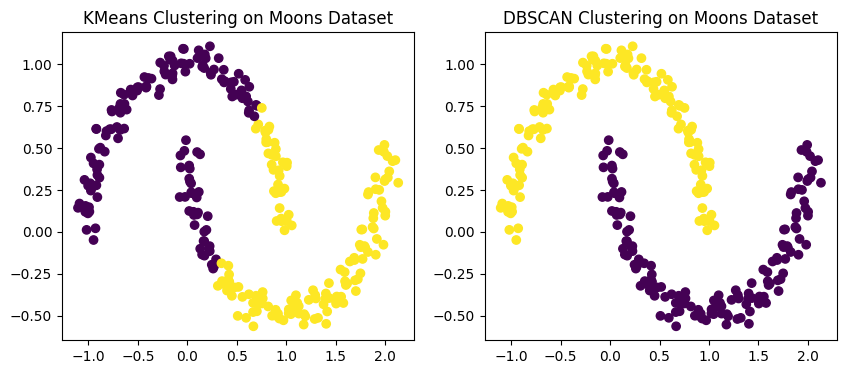

In [13]:
# Visualize the results
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_clusters, cmap='viridis', label='KMeans')
plt.title('KMeans Clustering on Moons Dataset')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_clusters, cmap='viridis', label='DBSCAN')
plt.title('DBSCAN Clustering on Moons Dataset')

This code snippet demonstrates how to apply DBSCAN to a synthetic "moons" dataset and visualize the results.


### <a id='toc1_6_'></a>[Tuning Epsilon (ε) and MinPts: A Practical Example](#toc0_)

Selecting appropriate values for ε and MinPts is crucial for DBSCAN's performance. Let's walk through an example of how to tune these parameters using the k-distance graph method and grid search.


#### <a id='toc1_6_1_'></a>[Step 1: Generate Sample Data](#toc0_)


First, we'll create a dataset with multiple clusters of varying densities:


Text(0.5, 1.0, 'Sample Dataset')

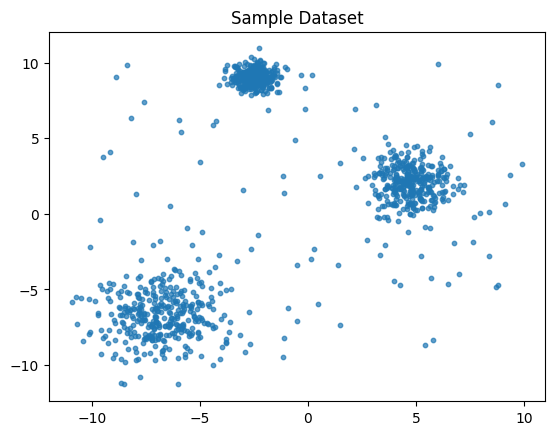

In [16]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
n_samples = 1000
X, _ = make_blobs(n_samples=n_samples, centers=3, cluster_std=[0.5, 1.0, 1.5], random_state=42)

# Add some noise
X = np.vstack((X, np.random.uniform(-10, 10, (100, 2))))

plt.scatter(X[:, 0], X[:, 1], alpha=0.7, s=10)
plt.title('Sample Dataset')


#### <a id='toc1_6_2_'></a>[Step 2: Create K-distance Graph](#toc0_)


The k-distance graph helps in selecting an appropriate ε value:


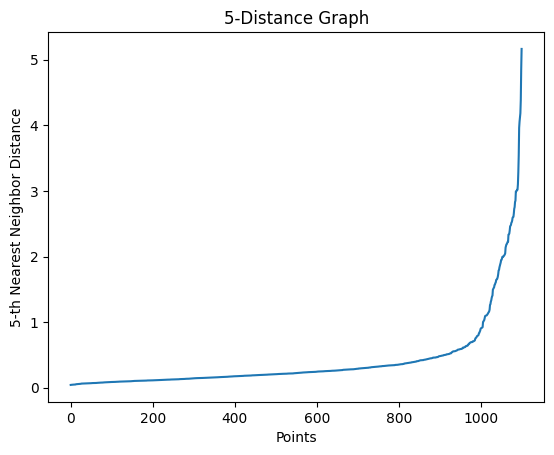

In [17]:
from sklearn.neighbors import NearestNeighbors

def plot_k_distance_graph(X, k):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X)
    distances, _ = neigh.kneighbors(X)
    distances = np.sort(distances[:, k-1])

    plt.plot(range(len(distances)), distances)
    plt.xlabel('Points')
    plt.ylabel(f'{k}-th Nearest Neighbor Distance')
    plt.title(f'{k}-Distance Graph')
    plt.show()

# Plot k-distance graph for k=5
plot_k_distance_graph(X, k=5)

💡 **Tip:** Look for the "elbow" in the k-distance graph. This point often provides a good initial estimate for ε.


#### <a id='toc1_6_3_'></a>[Step 3: Grid Search for Optimal Parameters](#toc0_)


We'll use a grid search to find the best combination of ε and MinPts:


In [18]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

def dbscan_grid_search(X, eps_range, min_samples_range):
    best_score = -1
    best_params = {}

    for eps in eps_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X)

            # Skip configurations that result in a single cluster or all noise points
            if len(set(labels)) == 1:
                continue

            score = silhouette_score(X, labels)

            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}

    return best_params, best_score

# Define parameter ranges
eps_range = np.arange(0.5, 2.0, 0.1)
min_samples_range = range(3, 10)

best_params, best_score = dbscan_grid_search(X, eps_range, min_samples_range)

print(f"Best parameters: {best_params}")
print(f"Best silhouette score: {best_score:.4f}")

Best parameters: {'eps': 1.8999999999999997, 'min_samples': 5}
Best silhouette score: 0.7718


#### <a id='toc1_6_4_'></a>[Step 4: Visualize Results with Optimal Parameters](#toc0_)


Finally, let's apply DBSCAN with the optimal parameters and visualize the results:


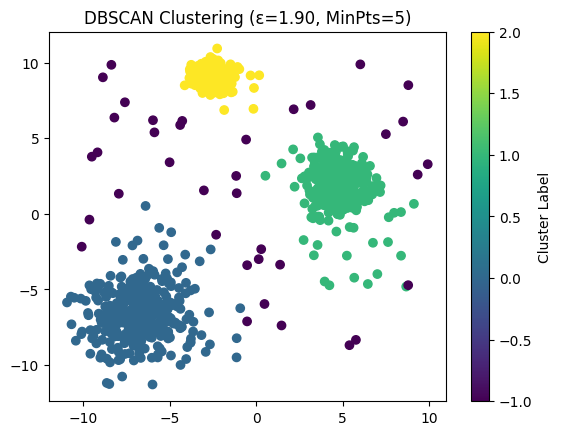

In [19]:
dbscan = DBSCAN(**best_params)
labels = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title(f'DBSCAN Clustering (ε={best_params["eps"]:.2f}, MinPts={best_params["min_samples"]})')
plt.colorbar(label='Cluster Label')
plt.show()

❗️ **Important Note:** While this method provides a systematic approach to parameter tuning, it's still important to visually inspect the results and potentially adjust parameters based on domain knowledge.


This example demonstrates a practical approach to tuning DBSCAN parameters. It combines the k-distance graph method for initial ε estimation with a grid search to fine-tune both ε and MinPts. The silhouette score is used as a metric to evaluate clustering quality, but other metrics could be used depending on the specific requirements of your application.


Remember that the optimal parameters may vary depending on the characteristics of your dataset, so it's always a good practice to experiment with different approaches and validate the results in the context of your specific problem.

### <a id='toc1_7_'></a>[Extensions and Variants](#toc0_)


While DBSCAN is powerful and widely used, it has some limitations, particularly when dealing with clusters of varying densities. Let's start by demonstrating this limitation with a Python example:

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

# Generate sample data with clusters of different densities
n_samples = 1000

# Cluster 1: Dense cluster
X1 = np.random.normal(0, 0.5, (n_samples // 2, 2))

# Cluster 2: Sparse cluster
X2 = np.random.normal(4, 2, (n_samples // 2, 2))

# Combine the clusters
X = np.vstack((X1, X2))

# Standardize the data
X_scaled = StandardScaler().fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
labels = dbscan.fit_predict(X_scaled)

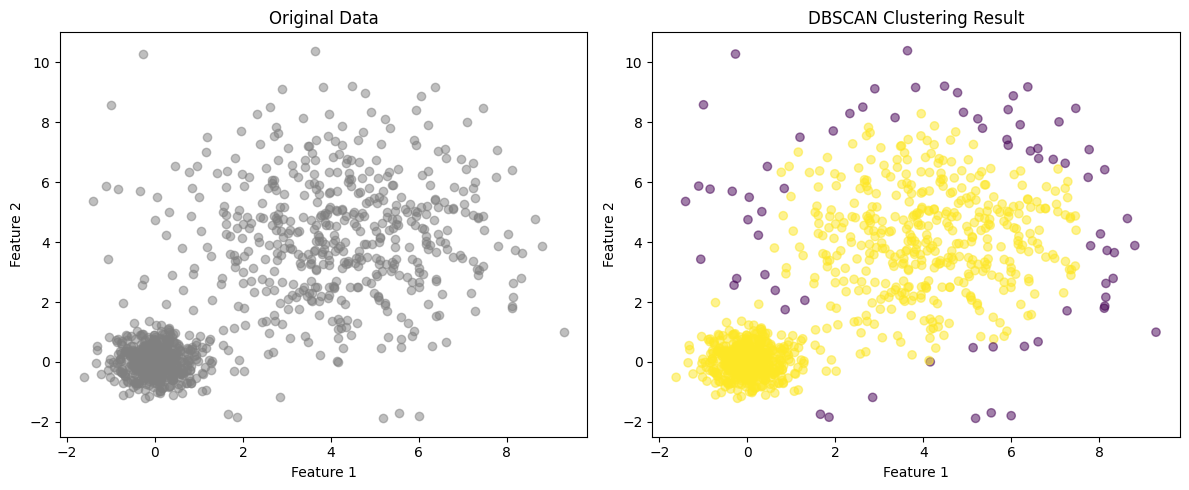

In [37]:
# Plot the results
plt.figure(figsize=(12, 5))

# Original data
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.5)
plt.title("Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# DBSCAN results
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.title("DBSCAN Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()

In [36]:
# Print the number of clusters found
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters found by DBSCAN: {n_clusters}")

Number of clusters found by DBSCAN: 1


This example generates two clusters with different densities: a dense cluster centered at (0, 0) and a sparse cluster centered at (4, 4). When we apply DBSCAN to this dataset, it struggles to identify both clusters correctly due to their varying densities.


💡 **Tip:** Experiment with different `eps` and `min_samples` values to see how they affect DBSCAN's performance on this dataset. You'll find that it's challenging to find parameters that work well for both clusters simultaneously.


To address limitations like this, several extensions and variants of DBSCAN have been proposed:

1. **OPTICS (Ordering Points To Identify the Clustering Structure)**
   OPTICS creates a reachability plot that can be used to extract clusters for different ε values. It's particularly useful for datasets with varying densities.

2. **HDBSCAN (Hierarchical DBSCAN)**
   HDBSCAN is a hierarchical version of DBSCAN that can handle varying density clusters more effectively. It builds a hierarchy of clusters and can extract a flat clustering based on the stability of clusters.

3. **ST-DBSCAN (Spatial-Temporal DBSCAN)**
   This extension is designed for spatial-temporal data, adding a temporal dimension to the clustering process. It's useful for applications like tracking moving objects or analyzing event data.

4. **GDBSCAN (Generalized DBSCAN)**
   GDBSCAN generalizes the concept of DBSCAN to work with different types of data and neighborhood definitions. It can be adapted to various domain-specific clustering tasks.

5. **IDBSCAN (Incremental DBSCAN)**
   This variant allows for incremental updates to the clustering as new data points are added, making it suitable for streaming data applications.


❗️ **Important Note:** While these variants address some limitations of DBSCAN, they often come with increased computational complexity or additional parameters to tune.


In the following sections, we'll explore some of these advanced density-based clustering techniques in more detail, starting with OPTICS, which is particularly effective for datasets with varying densities like the one in our example.

## <a id='toc2_'></a>[OPTICS: Ordering Points To Identify the Clustering Structure](#toc0_)

OPTICS (Ordering Points To Identify the Clustering Structure) is an advanced density-based clustering algorithm that addresses some of the limitations of DBSCAN, particularly its struggle with clusters of varying densities. Developed by Ankerst et al. in 1999, OPTICS creates a reachability plot that represents the clustering structure of the data and can be used to extract clusters at multiple density levels.


OPTICS introduces several key concepts:

1. **Core distance**: The minimum ε value that makes a point a core point (with respect to MinPts).
2. **Reachability distance**: The maximum of the core distance and the actual distance between two points.
3. **Reachability plot**: A visualization of the clustering structure, where points are ordered based on their reachability distances.


### <a id='toc2_1_'></a>[The OPTICS Algorithm](#toc0_)


The OPTICS algorithm follows these main steps:

1. For each unprocessed point p in the dataset:
   - a. Retrieve the ε-neighborhood of p.
   - b. Compute the core distance of p.
   - c. If p is a core point, expand the cluster from p.
   - d. Add p to the ordered list of points.

2. To expand a cluster:
   - a. For each point q in the ε-neighborhood of p:
      - Compute the reachability distance from p to q.
      - If q is not yet processed, add it to a priority queue (ordered by reachability distance).
   - b. While the priority queue is not empty:
      - Extract the point with the smallest reachability distance.
      - Process this point (go back to step 1).


### <a id='toc2_2_'></a>[Mathematical Formulation](#toc0_)


Let's formalize some key concepts:

- **Core distance**: For a point p, its core distance is defined as:

  $core_ε(p) = \begin{cases} 
  \text{UNDEFINED} & \text{if } |N_ε(p)| < \text{MinPts} \\
  \text{MinPts-distance}(p) & \text{otherwise}
  \end{cases}$

  where MinPts-distance(p) is the distance to the MinPts-th nearest neighbor of p.


- **Reachability distance**: For points p and o, the reachability distance is:

  $reach\_dist_ε(p, o) = \max(core_ε(o), dist(o, p))$


### <a id='toc2_3_'></a>[Advantages of OPTICS](#toc0_)


1. Can identify clusters with varying densities.
2. Provides a hierarchical clustering structure.
3. Does not require specifying a fixed ε value upfront.
4. Produces a reachability plot for intuitive visualization of cluster structure.


💡 **Tip:** The reachability plot can be particularly useful for determining appropriate ε values for DBSCAN on the same dataset.


### <a id='toc2_4_'></a>[Extracting Clusters from OPTICS](#toc0_)


While OPTICS primarily produces an ordering of points, clusters can be extracted in several ways:

1. **ε-clustering**: Similar to DBSCAN, but can be done for multiple ε values.
2. **Reachability-plot clustering**: Identify "dents" in the reachability plot as clusters.
3. **Gradient clustering**: Use the gradient of the reachability plot to identify significant clusters.


### <a id='toc2_5_'></a>[Implementing OPTICS in Python](#toc0_)


Here's an example of using OPTICS with scikit-learn, using the same dataset from our previous DBSCAN example:


In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import OPTICS
from sklearn.preprocessing import StandardScaler

# Use the same data generation as before
np.random.seed(42)
n_samples = 1000
X1 = np.random.normal(0, 0.5, (n_samples // 2, 2))
X2 = np.random.normal(4, 2, (n_samples // 2, 2))
X = np.vstack((X1, X2))
X_scaled = StandardScaler().fit_transform(X)

# Apply OPTICS
optics = OPTICS(min_samples=5, min_cluster_size=0.05)
labels = optics.fit_predict(X_scaled)

Text(0, 0.5, 'Feature 2')

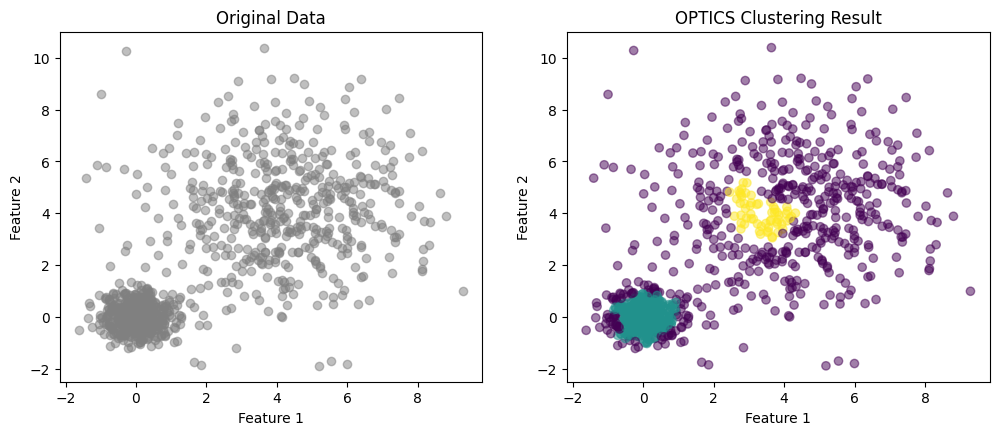

In [85]:
# Plot the results
plt.figure(figsize=(12, 10))

# Original data
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.5)
plt.title("Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# OPTICS clustering result
plt.subplot(222)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.title("OPTICS Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

In [74]:
reachability = optics.reachability_
ordering = optics.ordering_

In [75]:
reachability[ordering]

array([       inf, 0.038842  , 0.038842  , 0.03430575, 0.03430575,
       0.03430575, 0.03317381, 0.03820242, 0.038842  , 0.04062089,
       0.04382139, 0.04136922, 0.02629566, 0.02456592, 0.02456592,
       0.02323239, 0.02344584, 0.02463719, 0.02463719, 0.02463719,
       0.02479643, 0.02479643, 0.02479643, 0.01937256, 0.01937256,
       0.01937256, 0.01937256, 0.01937256, 0.01937256, 0.02396065,
       0.02644734, 0.02644734, 0.02796958, 0.02796958, 0.0202449 ,
       0.01979289, 0.01979289, 0.01882868, 0.01882868, 0.0202449 ,
       0.02240923, 0.02259787, 0.02427373, 0.02975571, 0.03084779,
       0.02276584, 0.02276584, 0.01895914, 0.01646233, 0.01628561,
       0.01541461, 0.01541461, 0.01541461, 0.01141536, 0.01647601,
       0.01682514, 0.01895914, 0.01895914, 0.01956969, 0.02361964,
       0.02128049, 0.02128049, 0.02128049, 0.02234411, 0.02476054,
       0.02476054, 0.02476054, 0.02476054, 0.02476054, 0.02559796,
       0.0259292 , 0.02590847, 0.02205689, 0.01728496, 0.01347

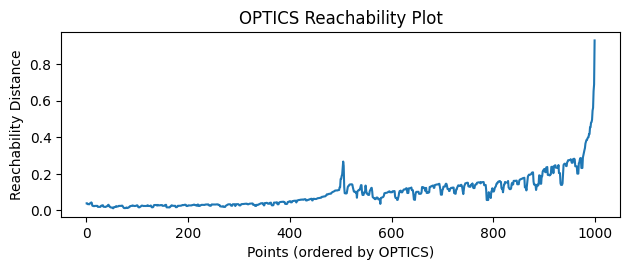

In [76]:
# Reachability plot
plt.subplot(212)
plt.plot(range(len(reachability)), reachability[ordering])
plt.title("OPTICS Reachability Plot")
plt.xlabel("Points (ordered by OPTICS)")
plt.ylabel("Reachability Distance")

plt.tight_layout()
plt.show()

In [77]:
# Print the number of clusters found
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters found by OPTICS: {n_clusters}")

Number of clusters found by OPTICS: 1


This code applies OPTICS to our dataset with varying density clusters and visualizes both the clustering result and the reachability plot.


❗️ **Important Note:** OPTICS can be more computationally expensive than DBSCAN, especially for large datasets. Consider using approximate nearest neighbors or other optimizations for better performance on big data.


### <a id='toc2_6_'></a>[Limitations and Considerations](#toc0_)


While OPTICS addresses many limitations of DBSCAN, it still has some considerations:

1. Higher computational complexity (O(n log n) vs O(n log n) or O(n²) for DBSCAN).
2. The reachability plot can be challenging to interpret for complex datasets.
3. Extracting a flat clustering from OPTICS results requires additional parameters or heuristics.


In the next section, we'll explore HDBSCAN, another powerful extension of DBSCAN that offers a different approach to handling varying density clusters.